In [8]:
import pandas_datareader.data as web
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
from pandas_datareader._utils import RemoteDataError
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
plt.rcParams['figure.figsize'] = [10, 6]


### Stratgey : Look for the past data, get stocks where volumes of today and yesterday are both postive and prior to that there were two days with negative volume
---

- Our investigation space will be the list of stocks in series_tickers file

In [9]:
#Download file "series_tickers.p" from github or create your own list of tickers
series_tickers = pickle.load(open("series_tickers.p", "rb" ))

-  here will create a class for the stock

In [16]:
class stock:
    def __init__(self,stock = 'NIO'):
        self.stock = stock
    
    def get_df(self):
        
        '''
        create a data frame for the stocks and manipulate it, a new column reflecting postive or negative is created, green for postive
        and red for negative
        
        inputs: 
        ------
        None
        
        returns:
        ------
        df : a dataframe which will be used with the subsequent  functions
        '''
        end_date = datetime.now().date()
        start_date = (datetime.now() - timedelta(days=6)).date()    
        df = web.DataReader(self.stock, 'yahoo', start=start_date, end=end_date)
        df = df.reset_index()

        df['close_before'] = df['Close'].shift(1) 
        df['relative_price'] = df['Close'] - df['close_before']
        df["Color"] = np.where(df["relative_price"]<0, 'red', 'green')

        df = df.iloc[::-1]
        df = df.reset_index(drop = True)
        df = df.fillna(0)
        self.df = df
        return self.df  
    
    def is_this_a_winner(self,colors = ['green','green','red','red']):
        '''
        given a condition by the user this function will return wether a stock matches that condition or not        
        inputs: 
        ------
        colors : list of colors for today and the previous 3 days, green indicates a positive volume and red indicates a negative volume
        
        returns:
        ------
        result : Boolean, True if the conditions in the colors list are met
        
        '''
        
        df = self.df
        result = np.where(df['Color'][0]== colors[0] and df['Color'][1]==colors[1] and df['Color'][2]==colors[2] and df['Color'][3]==colors[3],True,False)
        #result = np.where(df['Color'][0]=='green' and df['Color'][1]=='red' and df['Color'][2]=='red' and df['Color'][3]=='red' ,True,False)
        return result[()]
    
    def plot_df(self):
        '''
        displays a bar plot for the volume over time,green bar for positivie volume and red bar for negative volume         
        inputs: 
        '''   
        df = self.df

        df1 = df[df['relative_price']<0]
        df2 = df[df['relative_price']>=0]
        plt.bar(df1['Date'], df1['Volume'], color='r')
        plt.bar(df2['Date'], df2['Volume'], color='g')
        plt.show()
        return 
    

In [17]:
### Example:  let's try UBER stock

In [23]:
uber = stock('UBER')

In [24]:
# first we will have a look at the dataframe we have
uber.get_df()

,Date,High,Low,Open,Close,Volume,Adj Close,close_before,relative_price,Color
0,2020-10-20,36.759998,34.529999,34.529999,36.310001,29780800,36.310001,34.220001,2.090000,green
1,2020-10-19,34.590000,34.000000,34.160000,34.220001,19278600,34.220001,33.720001,0.500000,green
2,2020-10-16,34.799999,33.610001,34.779999,33.720001,14899700,33.720001,34.259998,-0.539997,red
3,2020-10-15,34.810001,34.020000,34.680000,34.259998,15443800,34.259998,35.110001,-0.850002,red
4,2020-10-14,36.090000,35.075001,35.689999,35.110001,15402900,35.110001,0.000000,0.000000,green


In [27]:
# let's test UBER stock with a condition that we know it does meet

conditions= ['green','green','red','red'] 

uber.is_this_a_winner(colors = conditions)

True

In [32]:
# ok, how about TSLA
tsla = stock('TSLA')
tsla.get_df()

,Date,High,Low,Open,Close,Volume,Adj Close,close_before,relative_price,Color
0,2020-10-20,431.750000,419.049988,431.750000,421.940002,31444700,421.940002,430.829987,-8.889984,red
1,2020-10-19,447.000000,428.869995,446.239990,430.829987,36287800,430.829987,439.670013,-8.840027,red
2,2020-10-16,455.950012,438.850006,454.440002,439.670013,32775900,439.670013,448.880005,-9.209991,red
3,2020-10-15,456.570007,442.500000,450.309998,448.880005,35672400,448.880005,461.299988,-12.419983,red
4,2020-10-14,465.899994,447.350006,449.779999,461.299988,48045400,461.299988,0.000000,0.000000,green


> Obviously it does not meet the conditions, let's check that

In [33]:
tsla.is_this_a_winner(colors = conditions)

False

>Voila, the code works fine

In [34]:
# let's visualize the plot

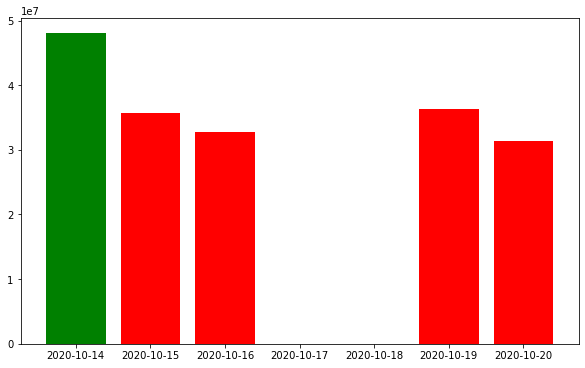

In [35]:

tsla.plot_df()

### Hunting for winners

- Now let's look at out list of stocks and find ones that meet our condition

Vonage Holdings Corp. - Common Stock is not a winner
Cadence Design Systems, Inc. - Common Stock is not a winner
Urban One, Inc.  - Class A Common Stock is not a winner
Broadcom Inc. - Common Stock is not a winner
Adobe Inc. - Common Stock is not a winner
Alexion Pharmaceuticals, Inc. - Common Stock is not a winner
Limelight Networks, Inc. - Common Stock is not a winner
Maxim Integrated Products, Inc. - Common Stock is not a winner
Ares Capital Corporation - Closed End Fund is not a winner
Costco Wholesale Corporation - Common Stock is not a winner
Genius Brands International, Inc. - Common Stock is not a winner
Foresight Autonomous Holdings Ltd. - American Depositary Shares is not a winner
Curis, Inc. - Common Stock is not a winner
NortonLifeLock Inc. - Common Stock is not a winner
Gevo, Inc. - Common Stock is not a winner
Digital Ally, Inc. - Common Stock is a winner


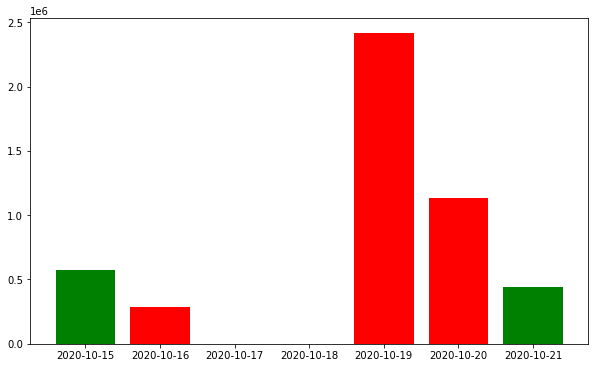

Qurate Retail, Inc. - Series A Common Stock is not a winner
Marriott International - Class A Common Stock is not a winner
Verastem, Inc. - Common Stock is not a winner
MacroGenics, Inc. - Common Stock is not a winner
Sabre Corporation - Common Stock is not a winner
Endo International plc - Ordinary Shares is not a winner
Beyond Meat, Inc. - Common stock is not a winner
Yandex N.V. - Class A Ordinary Shares is a winner


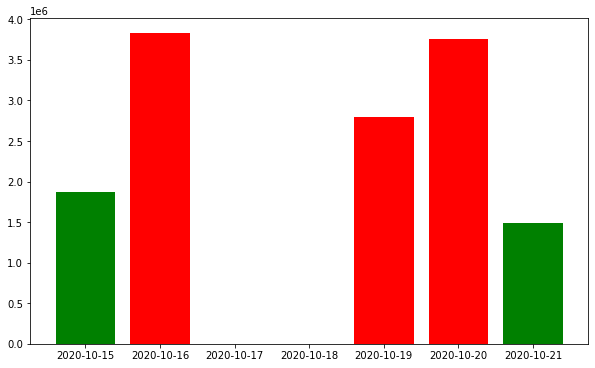

CommScope Holding Company, Inc. - Common Stock is not a winner
Digital Turbine, Inc. - Common Stock is not a winner
Duck Creek Technologies, Inc. - Common Stock is not a winner
Agenus Inc. - Common Stock is not a winner
Datadog, Inc. - Class A Common Stock is not a winner
Precipio, Inc. - Common Stock is not a winner
ZoomInfo Technologies Inc. - Class A Common Stock is not a winner
The Michaels Companies, Inc. - Common Stock is not a winner
eBay Inc. - Common Stock is not a winner
Evofem Biosciences, Inc. - Common Stock is not a winner
Chembio Diagnostics, Inc. - Common Stock is not a winner
Bilibili Inc. - American Depositary Shares is not a winner
Zions Bancorporation N.A. - Common Stock is not a winner
Zoom Video Communications, Inc. - Class A Common Stock is not a winner
People's United Financial, Inc. - Common Stock is not a winner
Zosano Pharma Corporation - Common Stock is not a winner
DISH Network Corporation - Class A Common Stock is not a winner
Infinera Corporation - Common 

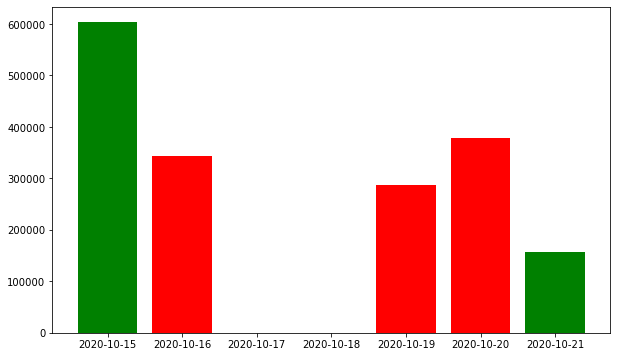

Midatech Pharma PLC - American Depositary Shares is not a winner
Sprouts Farmers Market, Inc. - Common Stock is not a winner
ON Semiconductor Corporation - Common Stock is not a winner
Clovis Oncology, Inc. - Common Stock is not a winner
Sangamo Therapeutics, Inc. - Common Stock is not a winner
Dave & Buster's Entertainment, Inc. - Common Stock is not a winner
Huntington Bancshares Incorporated - Common Stock is not a winner
Roku, Inc. - Class A Common Stock is a winner


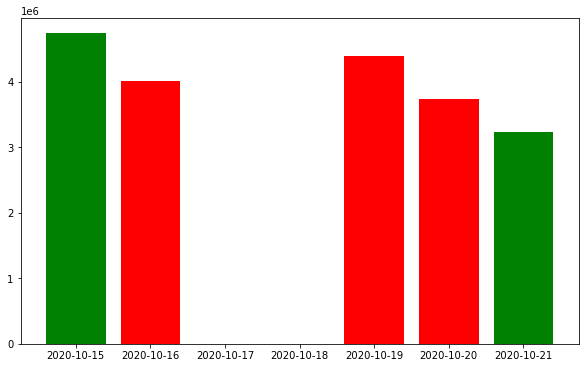

Diversified Healthcare Trust  - Common Shares of Beneficial Interest is not a winner
Akers Biosciences Inc. - Common Stock is not a winner
Starbucks Corporation - Common Stock is not a winner
Rigel Pharmaceuticals, Inc. - Common Stock is not a winner
Mondelez International, Inc. - Class A Common Stock is not a winner
Color Star Technology Co. Ltd. - Ordinary Shares is not a winner
Baidu, Inc. - American Depositary Shares, each representing one tenth Class A ordinary share is not a winner
Match Group, Inc. - Common Stock is not a winner
Invesco QQQ Trust, Series 1 is not a winner
Trip.com Group Limited - American Depositary Shares is not a winner
Peloton Interactive, Inc. - Common Stock is not a winner
Amarin Corporation plc - American Depositary Shares, each representing one Ordinary Share is not a winner
SmileDirectClub, Inc. - Common Stock is not a winner
Exelon Corporation - Common Stock is not a winner
Extended Stay America, Inc. - Paired Shares is not a winner
PayPal Holdings, Inc

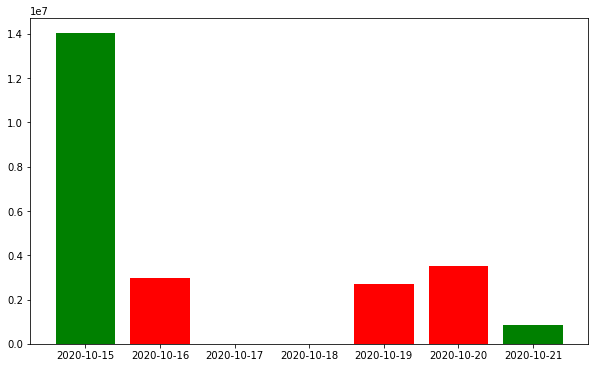

Phunware, Inc. - Common Stock is not a winner
Allscripts Healthcare Solutions, Inc. - common stock is a winner


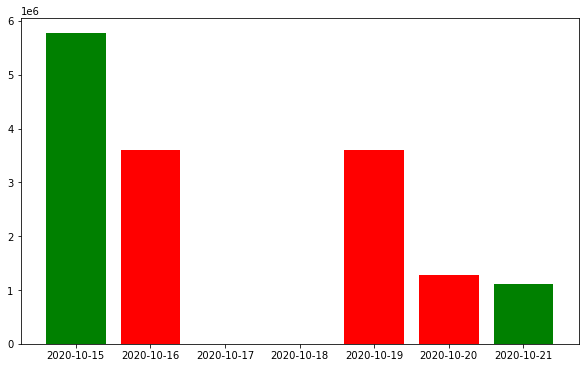

Monster Beverage Corporation - Common Stock is not a winner
Sunrun Inc. - Common Stock is not a winner
ADiTx Therapeutics, Inc. - Common Stock is not a winner
Ross Stores, Inc. - Common Stock is not a winner
SLM Corporation - Common Stock is not a winner
Arch Capital Group Ltd. - Common Stock is not a winner
The Cheesecake Factory Incorporated - Common Stock is not a winner
CSX Corporation - Common Stock is not a winner
AGNC Investment Corp. - Common Stock is not a winner
Ericsson - American Depositary Shares each representing 1 underlying Class B share is not a winner
Celsion Corporation - Common Stock is not a winner
Milestone Pharmaceuticals Inc. - Common Shares is not a winner
Capricor Therapeutics, Inc. - Common Stock is not a winner
Gilead Sciences, Inc. - Common Stock is not a winner
VBI Vaccines, Inc. - Ordinary Shares is not a winner
Novavax, Inc. - Common Stock is not a winner
NetApp, Inc. - Common Stock is not a winner
Houghton Mifflin Harcourt Company - Common Stock is not 

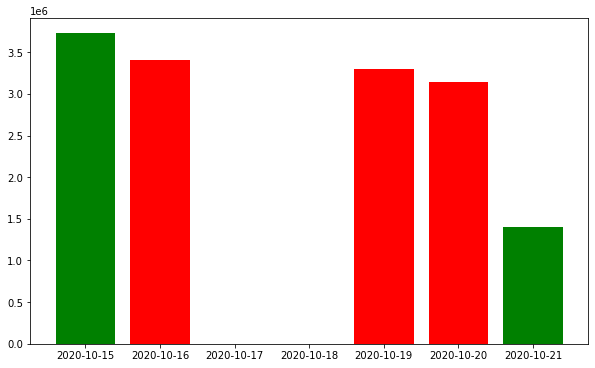

Fastenal Company - Common Stock is not a winner
Athersys, Inc. - Common Stock is not a winner
Lyft, Inc. - Class A Common Stock is not a winner
Polar Power, Inc. - Common Stock is not a winner
MEI Pharma, Inc. - Common Stock is not a winner
Aphria Inc. - Common Shares is not a winner
Sonnet BioTherapeutics Holdings, Inc. - Common Stock is not a winner
Clean Energy Fuels Corp. - Common Stock is not a winner
VEON Ltd. - American Depositary Shares is not a winner
Diamondback Energy, Inc. - Commmon Stock is not a winner
Miragen Therapeutics, Inc. - Common Stock is not a winner
Amicus Therapeutics, Inc. - Common Stock is not a winner
Xilinx, Inc. - Common Stock is not a winner
Discovery, Inc. - Series A Common Stock is not a winner
TherapeuticsMD, Inc. - Common Stock is not a winner
Outlook Therapeutics, Inc. - Common Stock is not a winner
Vanguard Total Bond Market ETF is not a winner
ANGI Homeservices Inc. - Class A Common Stock is not a winner
Noble Energy Inc. - Common Stock is not a wi

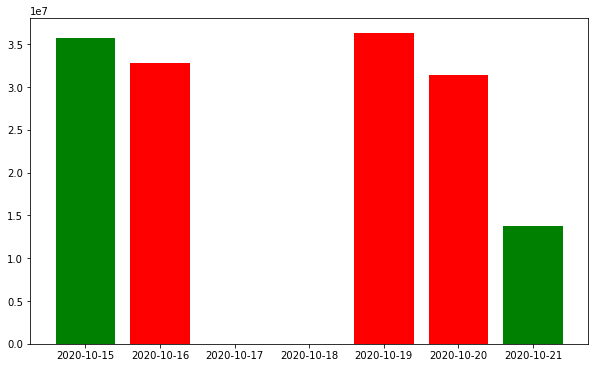

NVIDIA Corporation - Common Stock is not a winner
Western Digital Corporation - Common Stock is not a winner
Creative Realities, Inc. - Common Stock is not a winner
StoneCo Ltd. - Class A Common Share is not a winner
CymaBay Therapeutics Inc. - Common Stock is not a winner
TripAdvisor, Inc. - Common Stock is not a winner
Altimmune, Inc. - Common Stock is not a winner
Marvell Technology Group Ltd. - Common Stock is not a winner
VanEck Vectors Semiconductor ETF is not a winner
Livongo Health, Inc. - common stock is not a winner
GAN Limited - Ordinary Shares is a winner


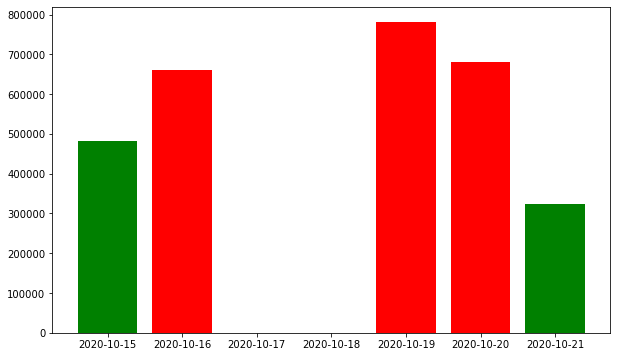

Bloomin' Brands, Inc. - Common Stock is a winner


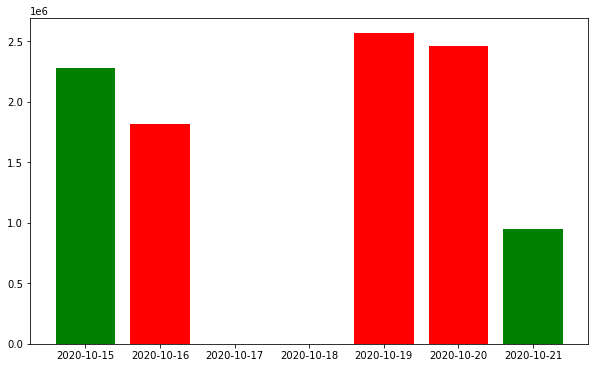

Moleculin Biotech, Inc. - Common Stock is not a winner
iShares Short Treasury Bond ETF is not a winner
ProShares UltraPro Short QQQ is not a winner
Royalty Pharma plc - Class A Ordinary Shares is not a winner
iShares MSCI China ETF is not a winner
Vislink Technologies, Inc. - Common Stock is not a winner
Analog Devices, Inc. - Common Stock is not a winner
Urban Outfitters, Inc. - Common Stock is a winner


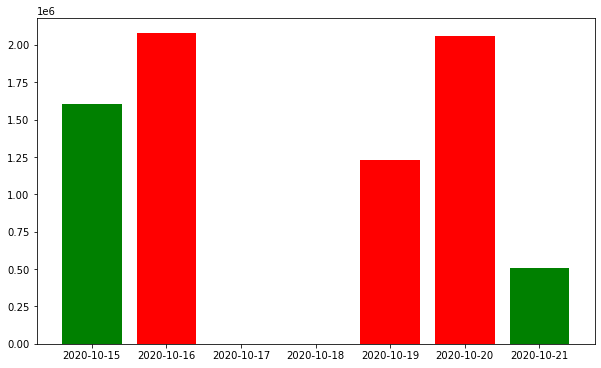

Jamf Holding Corp. - Common Stock is not a winner
TG Therapeutics, Inc. - Common Stock is not a winner
AIkido Pharma Inc. - Common Stock is not a winner
Apple Inc. - Common Stock is not a winner
Melco Resorts & Entertainment Limited - American Depositary Shares  is not a winner
Walgreens Boots Alliance, Inc. - Common Stock is not a winner
Sorrento Therapeutics, Inc. - Common Stock is not a winner
News Corporation - Class A Common Stock is not a winner
Liberty Global plc - Class C Ordinary Shares is not a winner
Gulfport Energy Corporation - Common Stock is not a winner
Ironwood Pharmaceuticals, Inc. - Class A Common Stock is not a winner
YRC Worldwide, Inc. - Common Stock is not a winner
Apache Corporation - Common Stock is not a winner
MYOS RENS Technology Inc. - Common Stock is not a winner
Vodafone Group Plc - American Depositary Shares each representing ten Ordinary Shares is not a winner
NewAge, Inc. - Common Stock is not a winner
Upwork Inc. - Common Stock is not a winner
Minerva

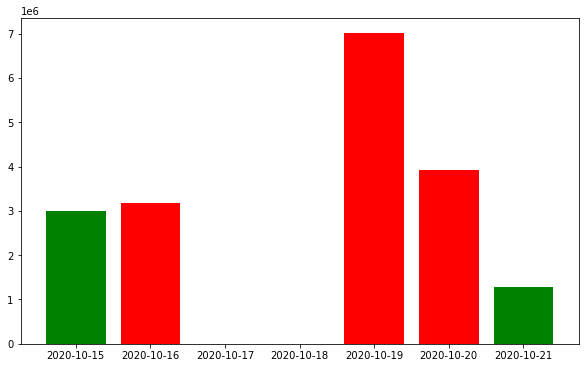

SiNtx Technologies, Inc. - Common Stock is not a winner
Inseego Corp. - Common Stock is not a winner
iQIYI, Inc. - American Depositary Shares is not a winner
Lipocine Inc. - Common Stock is not a winner
Urban One, Inc.  - Class D Common Stock is not a winner
Geron Corporation - Common Stock is not a winner
Pinduoduo Inc. - American Depositary Shares is not a winner
Flex Ltd. - Ordinary Shares is not a winner
BigCommerce Holdings, Inc. - Series 1 Common Stock is a winner


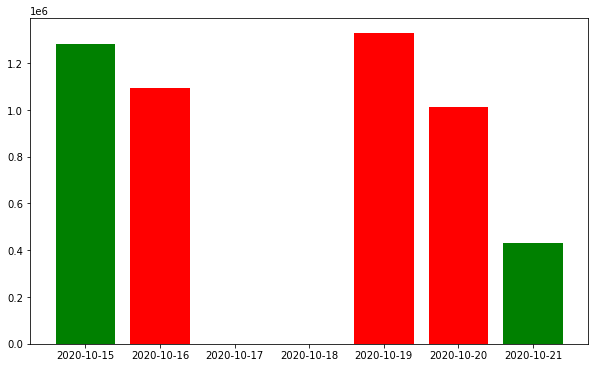

CleanSpark, Inc. - Common Stock is a winner


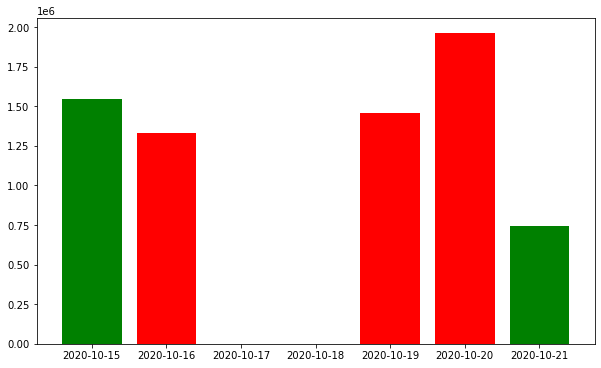

Activision Blizzard, Inc - Common Stock is not a winner
Organigram Holdings Inc. - Common Shares is not a winner
Newell Brands Inc. - Common Stock is not a winner
Bed Bath & Beyond Inc. - Common Stock is not a winner
Sirius XM Holdings Inc. - Common Stock is not a winner
DraftKings Inc. - Class A Common Stock is not a winner
MannKind Corporation - Common Stock is not a winner
Microchip Technology Incorporated - Common Stock is not a winner
Conduent Incorporated - Common Stock is not a winner
Texas Instruments Incorporated - Common Stock is not a winner
Kandi Technologies Group, Inc. - Common Stock is not a winner
Automatic Data Processing, Inc. - Common Stock is not a winner
Cemtrex Inc. - Common Stock is not a winner
Remark Holdings, Inc. - Common Stock is not a winner
Genprex, Inc. - Common Stock is not a winner
Vanguard Intermediate-Term Corporate Bond ETF is not a winner
Plug Power, Inc. - Common Stock is not a winner
Cisco Systems, Inc. - Common Stock is not a winner
Uniti Group I

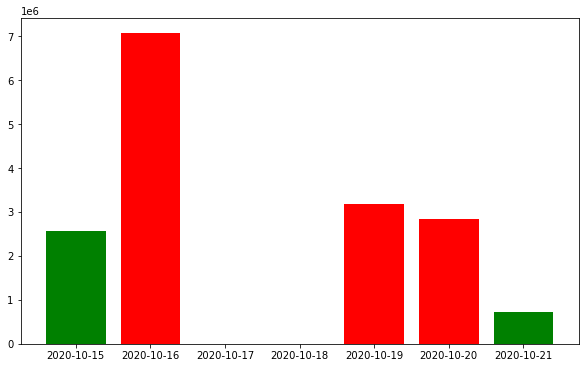

UP Fintech Holding Limited - American Depositary Shares representing fifteen Class A Ordinary Shares is not a winner
Cinedigm Corp - Class A Common Stock is not a winner
Vanguard Total International Stock ETF is not a winner
Nikola Corporation - Common Stock is not a winner
Invesco Optimum Yield Diversified Commodity Strategy No K-1 ETF is not a winner
SunPower Corporation - Common Stock is not a winner
Opko Health, Inc. - Common Stock is not a winner
JetBlue Airways Corporation - Common Stock is not a winner
Pacific Ethanol, Inc. - Common Stock is not a winner
Sonos, Inc. - Common Stock is not a winner
Cronos Group Inc. - Common Share is not a winner
Expedia Group, Inc. - Common Stock is not a winner
Canaan Inc. - American Depositary Shares is not a winner
Tellurian Inc. - Common Stock is not a winner
China Jo-Jo Drugstores, Inc. - Common Stock is not a winner
BELLUS Health Inc. - Common Shares is not a winner
Take-Two Interactive Software, Inc. - Common Stock is not a winner
Zynga In

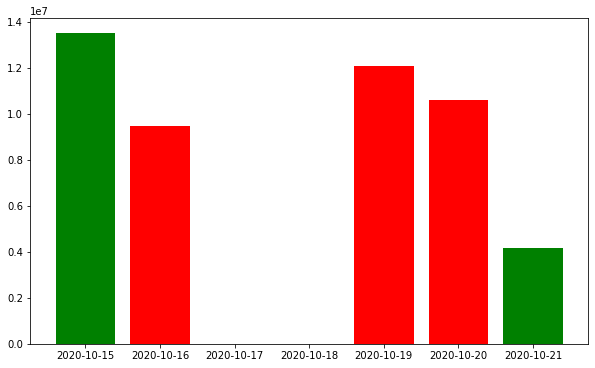

Boxlight Corporation - Class A Common Stock is not a winner
WiMi Hologram Cloud Inc. - American Depositary Share is not a winner
Discovery, Inc. - Series C Common Stock is not a winner
iShares Short-Term Corporate Bond ETF is not a winner
Viavi Solutions Inc. - Common Stock is not a winner
Unum Therapeutics Inc. - Common Stock is not a winner
Paychex, Inc. - Common Stock is not a winner
Enphase Energy, Inc. - Common Stock is not a winner
Safe-T Group Ltd. - American Depositary Shares is not a winner
Blink Charging Co. - Common Stock is not a winner
Cognizant Technology Solutions Corporation - Class A Common Stock is not a winner
Amgen Inc. - Common Stock is not a winner
Penn National Gaming, Inc. - Common Stock is not a winner
CureVac N.V. - Ordinary Shares is not a winner
Vanguard Short-Term Corporate Bond ETF is not a winner
Trevena, Inc. - Common Stock is not a winner
Adamis Pharmaceuticals Corporation - Common Stock is not a winner
ProShares UltraPro QQQ is not a winner
Skyworks So

In [51]:
winners = []  # a list that we will append with stocks that meet out conditions

for ticker, name in series_tickers.iteritems():
    try:
        my_stock = stock(ticker)
        my_stock.get_df()
        if my_stock.is_this_a_winner(colors = ['green','red','red','red']):
            print(name,'is a winner')
            my_stock.plot_df()
            winners.append(ticker)
        else:
            print(name,'is not a winner')
    except:
        continue

 

- Finally let's look at the list of our winners

In [41]:
winners

['UONE', 'LLNW', 'UAL', 'ERIC', 'UONEK', 'KNDI', 'NKLA']

In [47]:
df = uber.get_df()
df

,Date,High,Low,Open,Close,Volume,Adj Close,close_before,relative_price,Color
0,2020-10-20,36.759998,34.529999,34.529999,36.310001,29780800,36.310001,34.220001,2.090000,green
1,2020-10-19,34.590000,34.000000,34.160000,34.220001,19278600,34.220001,33.720001,0.500000,green
2,2020-10-16,34.799999,33.610001,34.779999,33.720001,14899700,33.720001,34.259998,-0.539997,red
3,2020-10-15,34.810001,34.020000,34.680000,34.259998,15443800,34.259998,35.110001,-0.850002,red
4,2020-10-14,36.090000,35.075001,35.689999,35.110001,15402900,35.110001,0.000000,0.000000,green


In [49]:
exp1 = df.Close.ewm(span=12, adjust=False).mean()
exp2 = df.Close.ewm(span=26, adjust=False).mean()

macd = exp1-exp2
macd

0    0.000000
1   -0.166724
2   -0.335334
3   -0.420537
4   -0.414693
Name: Close, dtype: float64